In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go  # <-- Move here


In [19]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,noise=38,random_state=2)

In [20]:
X.shape

(100, 1)

In [21]:
y.shape

(100,)

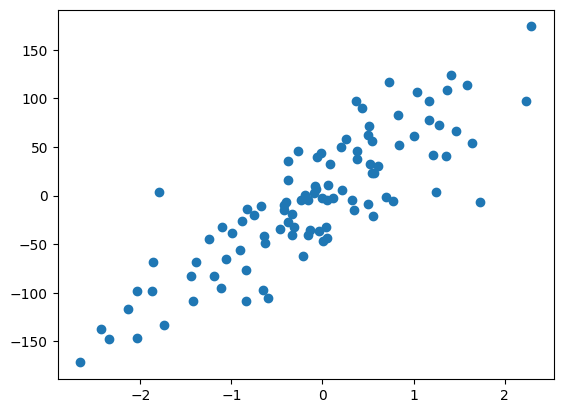

In [22]:
plt.scatter(X,y)

In [23]:
class GdRegressor:
    def __init__(self, m, b, epochs, lr):
        self.m = m
        self.b = b
        self.epochs = epochs
        self.lr = lr
        self.losses = []
        self.weights = []
        self.intercepts = []

    def fit(self, X, y):
        for _ in range(self.epochs):
            self.weights.append(self.m)
            self.intercepts.append(self.b)
            
            y_pred = X.ravel() * self.m + self.b
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)
            
            # Gradients
            grad_m = -2 * np.sum((y - y_pred) * X.ravel())
            grad_b = -2 * np.sum(y - y_pred)
            
            # Update weights
            self.m -= self.lr * grad_m
            self.b -= self.lr * grad_b

        print("Final m (slope):", self.m, "| Final b (bias):", self.b)

    def plot_loss(self):
        fig = go.Figure(data=[
            go.Scatter3d(
                x=self.weights,
                y=self.intercepts,
                z=self.losses,
                mode='lines+markers',
                marker=dict(size=4, color=self.losses, colorscale='Viridis'),
                line=dict(color='blue', width=2)
            )
        ])
        fig.update_layout(
            title='Gradient Descent Path in 3D Loss Space',
            scene=dict(
                xaxis_title='m (weight)',
                yaxis_title='b (bias)',
                zaxis_title='Loss'
            ),
            width=800,
            height=700,
            margin=dict(l=65, r=50, b=65, t=90)
        )
        fig.show()

    def predict(self, X):
        return X.ravel() * self.m + self.b
    def plot_surface(self, X, y):
        X = X.flatten()
        y = y.flatten()

        m_vals = np.linspace(self.m - 10, self.m + 10, 100)
        b_vals = np.linspace(self.b - 10, self.b + 10, 100)
        M, B = np.meshgrid(m_vals, b_vals)

        Z = np.zeros_like(M)

        for i in range(M.shape[0]):
            for j in range(M.shape[1]):
                y_pred = M[i, j] * X + B[i, j]
                loss = np.mean((y - y_pred) ** 2)
                Z[i, j] = loss

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(M, B, Z, cmap='viridis', alpha=0.9)
        ax.set_xlabel("Slope (m)")
        ax.set_ylabel("Bias (b)")
        ax.set_zlabel("MSE Loss")
        ax.set_title("3D Loss Surface (Curved)")
        plt.show()



In [24]:
gd=GdRegressor(100,0,1000,0.001)
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


In [26]:
gd.fit(x_train,y_train)

Final m (slope): 54.03294684512257 | Final b (bias): -0.38179830439249307


In [27]:
gd.plot_loss()

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()


In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
lr.coef_,lr.intercept_

(array([54.03294685]), np.float64(-0.38179830439249507))

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np



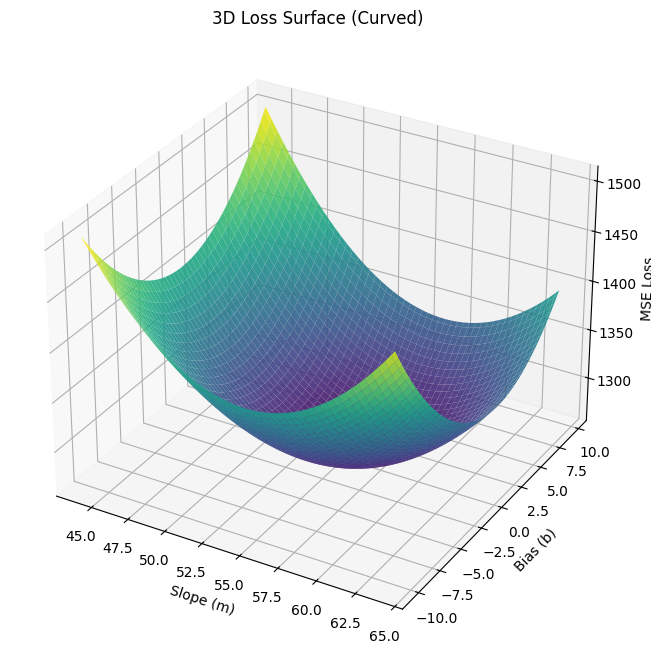

In [33]:
gd.plot_surface(X,y)

In [35]:
gd2=GdRegressor(100,0,100,0.01)
gd2.fit(X,y)
gd2.plot_loss()

Final m (slope): 17772091847382.473 | Final b (bias): -11861009000244.746


In the two 3d graphs we see that one is converging properly to the minimal value and one is oscaillting which shows the effect of the non optimal learning rate on gradient descent.

Another problem with the gradient descent is that it may converge to the local minima.